# Borrador Proyecto IMT-2200 Grupo 28


Este jupyter notebook tiene como proposito hacer el analisis de admision a la educacion superior dentro de los años 20xx'2024.
Esta echo de manera explicativa con graficos y interpretaciones para cada caso, se recomienda ir directo a la seccion de Interpretacion para saltarse la parte tecnica.


## Índice

- **Import de librería**
    - Explicacinn de libreria a utilizar.
  

- **Lectura de archivos**
    - Leer el archivo de datos
    - Vista previa de los datos

- **Limpieza de datos**
    - Eliminar null y datos inconsistentes
    - Corregir errores
    - Tratar con duplicados
    - Renombrar columnas

- **Análisis de los Datos(EDA)**
    - Juntar bases
    - Hacer gráficos
    - ...
- **PREGUNTAS DE INVESTIGACIÓN**

  1. ¿Cuántas personas se inscribieron en cada periodo de admisión entre 2004 y 2025?


  2. ¿Hubo un aumento en las inscripciones en los periodos de transición (PSU/PTU/PAES)?


  3. Según el grupo socioeconómico, ¿cuál fue el porcentaje de ingresos en las distintas universidades?


  4. ¿Qué comunas presentaron los mayores porcentajes de ingresos a la educación superior?


  5. ¿Qué relación existe entre la situación de egreso de los estudiantes y los resultados de admisión a la educación superior?
 


*Nuevas pregunta surgida en el proceso EDA:*

    - ¿En los últimos años, los individuos que repiten la PAES logran mejorar sus puntajes?
     

    

- **Conclusiones**
    - Resumen Tecnico
    - ...

## Import de librerias a utilizar


- **Pandas**: Creación del DataFrame, su limpieza, joins, groupby, etc.
- **Numpy**: Pasar algunos datos a arreglos, vectores y matrices.
- **Matplotlib**: Gráficos.
- **Plotly**: Gráficos interactivos para la exploración y visualización.
- **...**


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from pathlib import Path
from copy import deepcopy as dcopy
#import geopandas as gpd


### Recoleccion de datos
 Se descargaron los Datos de forma manual a partir del siguiente link [https://portal-transparencia.demre.cl/portal-base-datos], descargados desde la Pagina oficial del demre, a traves de esto se hizo esta carpeta[[https://uccl0-my.sharepoint.com/:f:/g/personal/sebastin_mena_estudiante_uc_cl/EhgUUbAemNVLubCEjJvLvMkBOtbi40OF61aDvJpW7fV5DA?e=ymSFkT]] para una descarga facil de los datos, respecto a la ruta para la visualizacion de los datos se encuentran en el github, sin embargo la ruta a presentar es la siguiete :
```
2025-2/
|_ datos/
|__|_datos_limpios
|_ raw_data/
|__|_datos_brutos [en esta ruta se incertan los datos]
|_ .gitignore
|_ Borrador_Proyecto.ipynb
|_ GRUPO_28_PROYEECTO_IMT2200.PDf 
|_ README.md
```

## Contexto y motivacion

Nuestro Proyecto se enmarca en el análisis de los datos respecto a la educación superior de nuestro país, que ha transitado desde la PSU / PTU / PAES. Buscamos hacer un análisis para saber cómo afecta la desigualdad a nuestro país, pensando en cómo poder "reducir esta desigualdad" que afecta a nuestra nación y a nuestra educación, tal como se puede ver en el siguiente artículo: [https://www.elciudadano.com/educacion/paes-2022-pobreza-desigualdad-y-mala-calidad-educativa-caldo-de-cultivo-de-una-catastrofe-social/01/07/]

Como motivaciones Grupales, está el poder responder dudas respecto a la equidad real en el acceso a la universidad para la ciudadanía, por medio del proceso de admisión, buscando aportar una mirada a este tema.

Respecto a la PSU, PAES y PTU, estas fueron pruebas de admisión a la selección universitaria:

PSU (Prueba de Selección Universitaria): Fue una prueba estándar que estuvo vigente durante 17 años, entre 2003 y 2020.

PTU (Prueba de Transición Universitaria): Fue una prueba temporal que duró 2 años, entre 2020 y 2021, para la "transición" mientras se desarrollaba el sistema PAES.

PAES (Prueba de Acceso a la Educación Superior): Es la prueba que se utiliza actualmente desde el 2022. Esta prueba es el reemplazo de la PSU y busca crear un sistema más equitativo, enfocándose más en competencias en vez de conocimiento.

## Lectura de Archivos


    - Leer el archivo de datos
    - Vista previa de los datos

**-Leer el archivo de datos**

In [15]:
adm = []   # adm> lista con  df admision por years 

#archivos de admision estan en  ArchivoC_Adm20xx
print("Iniciando lectura ... \n \n")
for num in range(2004 ,2026):
    ruta = Path(f"raw_data/{num}")
    csv = ruta.glob(f"**/ArchivoC_Adm{num}*.csv")
    
    for archivo in csv:
        print(archivo)
        adm.append(pd.read_csv(archivo , sep = ";" , low_memory=False))
if len(adm) == 22:
    print("\n\nLectura correcta datos admision 2004-2025")
else:
    print("\n\n Error en la lectura de datos, faltan archivos/mala lectura")

Iniciando lectura ... 
 

raw_data/2004/PROCESO-DE-ADMISIÓN-2004-RENDICIÓN-17-12-2024T15-39-17/Rinden_Admisión2004/ArchivoC_Adm2004.csv
raw_data/2005/PROCESO-DE-ADMISIÓN-2005-RENDICIÓN-17-12-2024T15-43-59/Rinden_Admisión2005/ArchivoC_Adm2005.csv
raw_data/2006/PROCESO-DE-ADMISIÓN-2006-RENDICIÓN-17-12-2024T15-50-29/Rinden_Admisión2006/ArchivoC_Adm2006.csv
raw_data/2007/PROCESO-DE-ADMISIÓN-2007-RENDICIÓN-17-12-2024T15-57-04/Rinden_Admisión2007/ArchivoC_Adm2007.csv
raw_data/2008/PROCESO-DE-ADMISIÓN-2008-RENDICIÓN-17-12-2024T16-00-49/Rinden_Admisión2008/ArchivoC_Adm2008.csv
raw_data/2009/PROCESO-DE-ADMISIÓN-2009-RENDICIÓN-17-12-2024T16-10-42/Rinden_Admisión2009/ArchivoC_Adm2009.csv
raw_data/2010/PROCESO-DE-ADMISIÓN-2010-RENDICIÓN-17-12-2024T16-13-20/Rinden_Admisión2010/ArchivoC_Adm2010.csv
raw_data/2011/PROCESO-DE-ADMISIÓN-2011-RENDICIÓN-17-12-2024T16-15-41/Rinden_Admisión2011/ArchivoC_Adm2011.csv
raw_data/2012/PROCESO-DE-ADMISIÓN-2012-RENDICIÓN-17-12-2024T16-18-42/Rinden_Admisión2012/Archi

## Lectura de Archivos enfocada en Responder pregunta 4 

In [16]:

comuna = []
for num in range(2004, 2026):
    num = str(num)
    ruta = Path(f"raw_data/{num}")
    exel = ruta.glob("**/*.xlsx")
    for i in exel:
        if i.name == f"Libro_CódigosADM{num}_ArchivoC.xlsx" or  i.name == f"Libro_CódigosADM{num} _ArchivoC.xlsx": 
            #el or es por un error en como se llama el archivo en 2019
            comuna.append(pd.read_excel(i, sheet_name="Anexo - ComunasRegiones"))
print(len(comuna))
print(len(adm))


datos_egresado = []   # adm> lista con  df admision por years 

#archivos de admision estan en  ArchivoC_Adm20xx
print("Iniciando lectura ... \n \n")
for num in range(2018 ,2026):
    ruta = Path(f"raw_data/{num}")
    csv = ruta.glob(f"**/ArchivoMatr_Adm{num}*.csv")
    
    for archivo in csv:
        print(archivo)
        datos_egresado.append(pd.read_csv(archivo , sep = ";" , low_memory=False))
if len(datos_egresado) == 8:
    print("\n\nLectura correcta matricula 2018-2025")
else:
    print("\n\n Error en la lectura de datos, faltan archivos/mala lectura")


22
22
Iniciando lectura ... 
 

raw_data/2018/PROCESO-DE-ADMISIÓN-2018-MATRÍCULA-17-12-2024T16-04-30/Matricula_Admisión2018/ArchivoMatr_Adm2018.csv
raw_data/2019/PROCESO-DE-ADMISIÓN-2019-MATRÍCULA-17-12-2024T15-59-24/Matricula_Admisión2019/ArchivoMatr_Adm2019.csv
raw_data/2020/PROCESO-DE-ADMISIÓN-2020-MATRÍCULA-17-12-2024T15-54-39/Matricula_Admisión2020/ArchivoMatr_Adm2020.csv
raw_data/2021/PROCESO-DE-ADMISIÓN-2021-MATRÍCULA-17-12-2024T15-46-44/Matricula_Admisión2021/ArchivoMatr_Adm2021.csv
raw_data/2022/PROCESO-DE-ADMISIÓN-2022-MATRÍCULA-17-12-2024T15-42-10/Matricula_Admisión2022/ArchivoMatr_Adm2022.csv
raw_data/2023/PROCESO-DE-ADMISIÓN-2023-MATRÍCULA-17-12-2024T15-35-09/Matricula_Admisión2023/ArchivoMatr_Adm2023.csv
raw_data/2024/PROCESO-DE-ADMISIÓN-2024-MATRÍCULA-17-12-2024T14-38-28/ArchivoMatr_Adm2024.csv
raw_data/2025/PROCESO-DE-ADMISIÓN-2025-MATRÍCULA-23-04-2025T11-54-04/Matricula_Admisión2025/ArchivoMatr_Adm2025.csv


Lectura correcta matricula 2018-2025


In [17]:
## no eliminar, me sirvio para generar mi codigo, saco ideas de aqui para la lectura de los demas, cuando sea necesario...
"""dataframes = []
print("si")
#idea, crear el dataframe
for num in range(2004 ,2026):
    dataframe_actual = []
    num = str(num)
    ruta = Path(f"raw_data/{num}")
    csv = ruta.glob("**/*.csv")
    exel = ruta.glob("**/*.xslx")
    
    for archivo in csv:
        dataframe_actual.append(pd.read_csv(archivo , sep = ";" , low_memory=False))
    for archivo_e in exel:
        #excel da problemitas xdddd
        try:
            dataframe_actual.append(pd.read_excel(archivo_e , engine = "openpyxl"))
        finally:
            pass

    dataframes.append(pd.concat(dataframe_actual, axis = 0))"""


                

'dataframes = []\nprint("si")\n#idea, crear el dataframe\nfor num in range(2004 ,2026):\n    dataframe_actual = []\n    num = str(num)\n    ruta = Path(f"raw_data/{num}")\n    csv = ruta.glob("**/*.csv")\n    exel = ruta.glob("**/*.xslx")\n\n    for archivo in csv:\n        dataframe_actual.append(pd.read_csv(archivo , sep = ";" , low_memory=False))\n    for archivo_e in exel:\n        #excel da problemitas xdddd\n        try:\n            dataframe_actual.append(pd.read_excel(archivo_e , engine = "openpyxl"))\n        finally:\n            pass\n\n    dataframes.append(pd.concat(dataframe_actual, axis = 0))'

**-Vista previa de los datos**

In [18]:
adm[0].head()

,ID_aux,GRUPO_DEPENDENCIA,RAMA,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,LENG_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,PROM_NOTAS,PTJE_NEM
0,id_001160071115,3,T1,1,1,201.0,469,457,437,426,63,682
1,id_0016900171627,3,H2,5,3,240.0,492,457,513,0,53,481
2,id_0016900571641,3,T1,5,2,225.0,391,442,0,396,48,376
3,id_0028900472899,3,H1,1,8,415.0,353,487,402,0,48,373
4,id_004500078456,2,H2,1,10,510.0,430,425,451,0,54,501


In [19]:
adm[21].head()

,ID_aux,RBD,COD_ENS,GRUPO_DEPENDENCIA,RAMA_EDUCACIONAL,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,PROMEDIO_NOTAS,PORC_SUP_NOTAS,...,MATE2_REG_ANTERIOR,HCSOC_REG_ANTERIOR,CIEN_REG_ANTERIOR,MODULO_REG_ANTERIOR,CLEC_INV_ANTERIOR,MATE1_INV_ANTERIOR,MATE2_INV_ANTERIOR,HCSOC_INV_ANTERIOR,CIEN_INV_ANTERIOR,MODULO_INV_ANTERIOR
0,id_815728178577,11284.0,363.0,3.0,H2,1,6.0,6101.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_985329876535,20356.0,363.0,2.0,H2,1,4.0,4101.0,"6,55",10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_767127676717,14846.0,363.0,2.0,H2,1,5.0,5101.0,"6,6",10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_112621173264,NaN,NaN,NaN,NaN,5,NaN,NaN,"6,15",10,...,616.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_497424971745,22633.0,363.0,2.0,H2,1,14.0,14101.0,"6,4",10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Nota: Se me ocurrió la idea de visualizar cuánto sube en promedio el puntaje de la gente que da la PAES por segunda vez. 
###### ¿Vale la pena volver a darla?


## Limpieza de datos


    - Eliminar null y datos inconsistentes
    - Corregir errores
    - Tratar con duplicados
    - Renombrar columnas

-**Eliminar null y datos inconsistentes**


In [20]:
for y in range(len(adm)):
    adm[y].fillna(0,inplace=True)
    


In [21]:
adm[0].head()

,ID_aux,GRUPO_DEPENDENCIA,RAMA,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,LENG_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,PROM_NOTAS,PTJE_NEM
0,id_001160071115,3,T1,1,1,201.0,469,457,437,426,63,682
1,id_0016900171627,3,H2,5,3,240.0,492,457,513,0,53,481
2,id_0016900571641,3,T1,5,2,225.0,391,442,0,396,48,376
3,id_0028900472899,3,H1,1,8,415.0,353,487,402,0,48,373
4,id_004500078456,2,H2,1,10,510.0,430,425,451,0,54,501


In [22]:
adm[8].head()

,ID_aux,RBD,GRUPO_DEPENDENCIA,RAMA,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,LENG_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,MODULO_ACTUAL,LENG_ANTERIOR,MATE_ANTERIOR,HCSO_ANTERIOR,CIEN_ANTERIOR,MODULO_ANTERIOR,PROM_NOTAS,PTJE_NEM
0,id_0000900270000,7,3,T3,1,15,15101.0,312,418,341,0,0,0,0,0,0,0,61,641
1,id_0000900270002,12547,2,H1,1,15,15101.0,507,516,598,0,0,0,0,0,0,0,64,702
2,id_0000900270003,342,2,H1,1,2,2101.0,557,653,0,589,QUI,0,0,0,0,0,57,558
3,id_0000900270005,12610,3,T1,1,15,15101.0,363,418,306,0,0,0,0,0,0,0,59,601
4,id_0000900270007,12610,3,T1,1,15,15101.0,339,383,370,0,0,0,0,0,0,0,59,601


## Análisis de los Datos(EDA)


    - Juntar bases
    - Hacer gráficos
    - ...

En cada pregunta tiene su propio EDA, se vio que era la forma mas eficiente al trabajar en conjunto.

In [103]:
adm[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153982 entries, 0 to 153981
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID_aux             153982 non-null  object 
 1   GRUPO_DEPENDENCIA  153982 non-null  int64  
 2   RAMA               153982 non-null  object 
 3   SITUACION_EGRESO   153982 non-null  int64  
 4   CODIGO_REGION      153982 non-null  int64  
 5   CODIGO_COMUNA      152913 non-null  float64
 6   LENG_ACTUAL        153982 non-null  int64  
 7   MATE_ACTUAL        153982 non-null  int64  
 8   HCSO_ACTUAL        153982 non-null  int64  
 9   CIEN_ACTUAL        153982 non-null  int64  
 10  PROM_NOTAS         153982 non-null  int64  
 11  PTJE_NEM           153982 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 14.1+ MB


In [105]:
comuna[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CR                345 non-null    int64 
 1   NOMBRE_REGION     345 non-null    object
 2   CPR               345 non-null    int64 
 3   NOMBRE_PROVINCIA  345 non-null    object
 4   C_COM             345 non-null    int64 
 5   NOMBRE_COMUNA     345 non-null    object
dtypes: int64(3), object(3)
memory usage: 16.3+ KB


## PREGUNTAS DE INVESTIGACIÓN 

### Pregunta 1.
###### ¿Cuántas personas se inscribieron en cada periodo de admisión entre 2004 y 2025?

In [23]:
tmp =[]
for x in range(len(adm)):
    tmp.append(adm[x].shape[0])
print(tmp)

[153982, 169888, 176778, 212889, 218261, 243809, 253236, 252402, 242661, 244707, 243596, 257852, 266494, 269351, 274498, 278287, 292091, 238818, 254191, 293865, 306497, 311084]


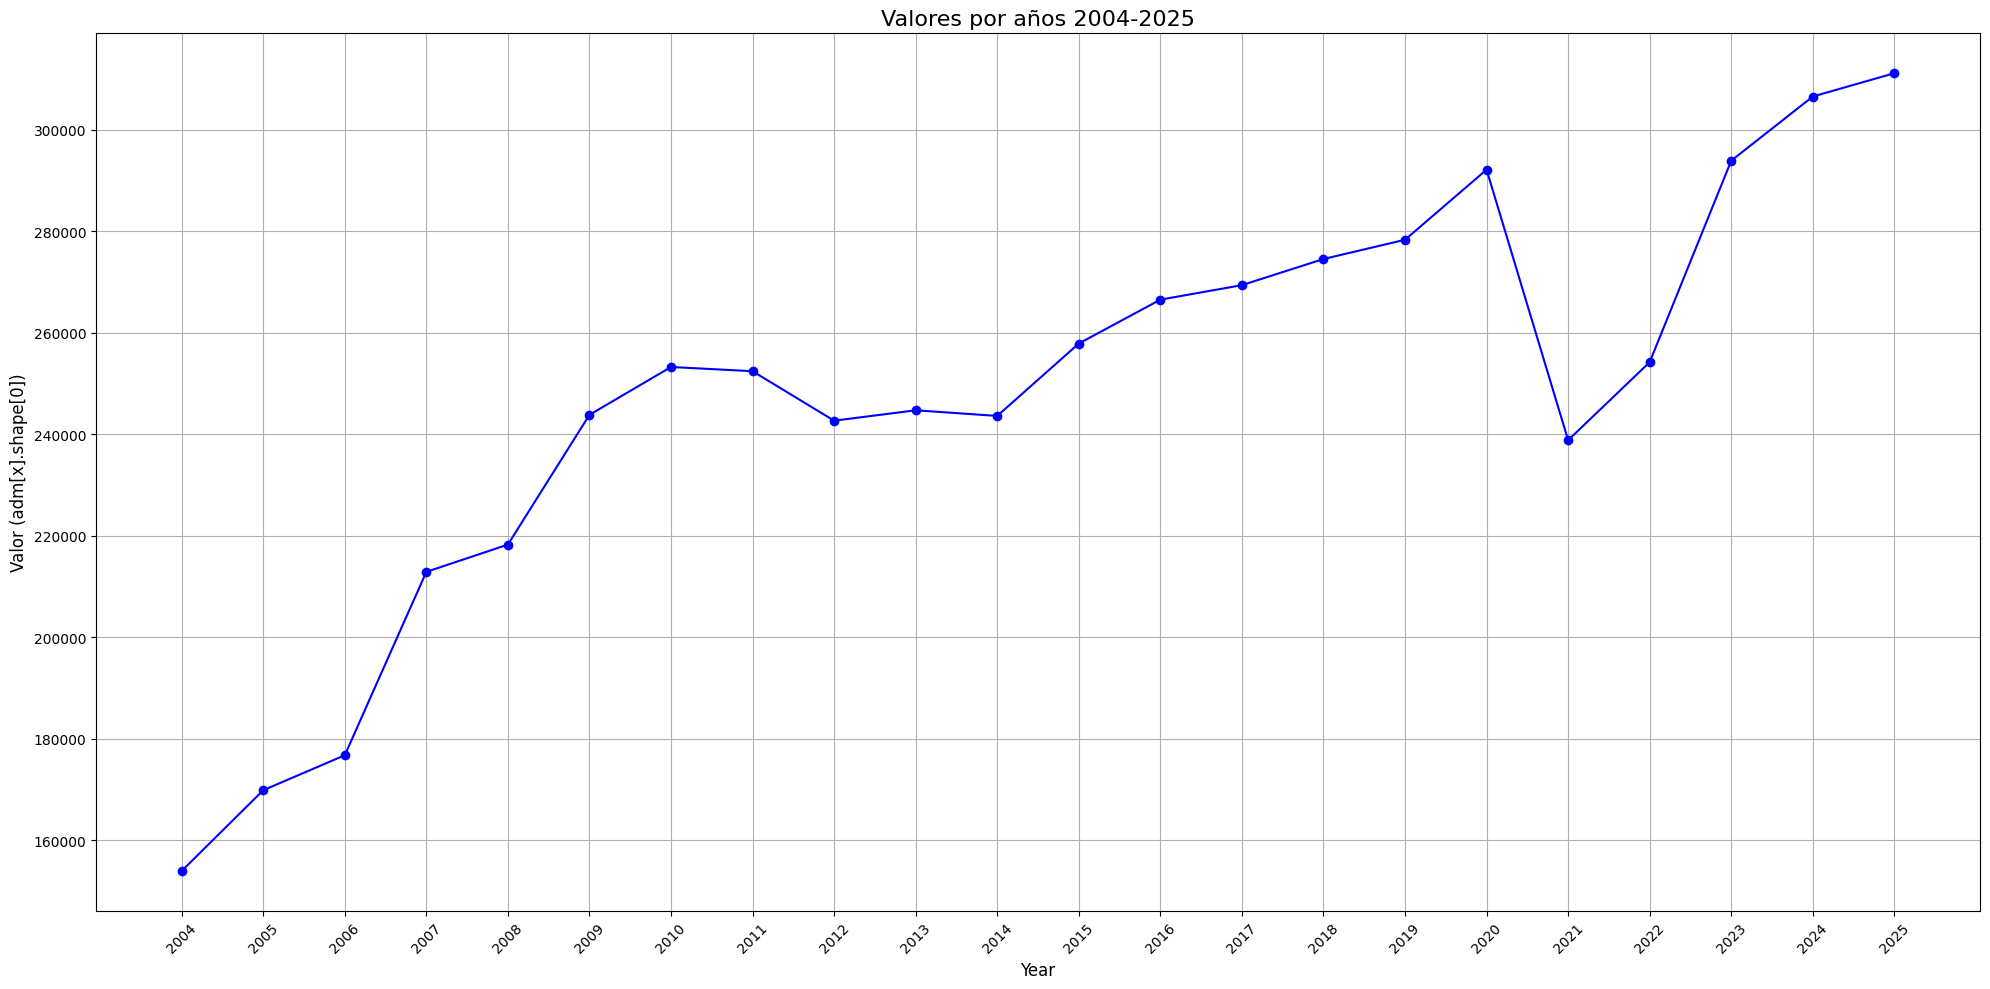

In [97]:
tmp = [153982, 169888, 176778, 212889, 218261,
       243809, 253236, 252402, 242661, 244707,
       243596, 257852,266494, 269351, 274498,
       278287, 292091,238818, 254191, 293865,
       306497, 311084]

years = list(range(2004, 2026))


plt.figure(figsize=(20, 10))
plt.plot(years, tmp, marker='o', linestyle='-', color='b')
plt.title('Valores por años 2004-2025', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Valor (adm[x].shape[0])', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

##### Podemos ver el grafico como ha habiado un aumento en las inscripciones a la prueba de educacion superios.
##### A su vez, logramos identificar la cantidad de inscripciones por año.
##### Se ve el claro descenso por la pandemia, que es el unico pick grande de bajada. Pero tambien un comportamiento extra;o en el 2010 que veremos mas adelante.

##### 

### Pregunta 2.
###### ¿Hubo un aumento en las inscripciones en los periodos de transición (PSU/PTU/PAES)? 

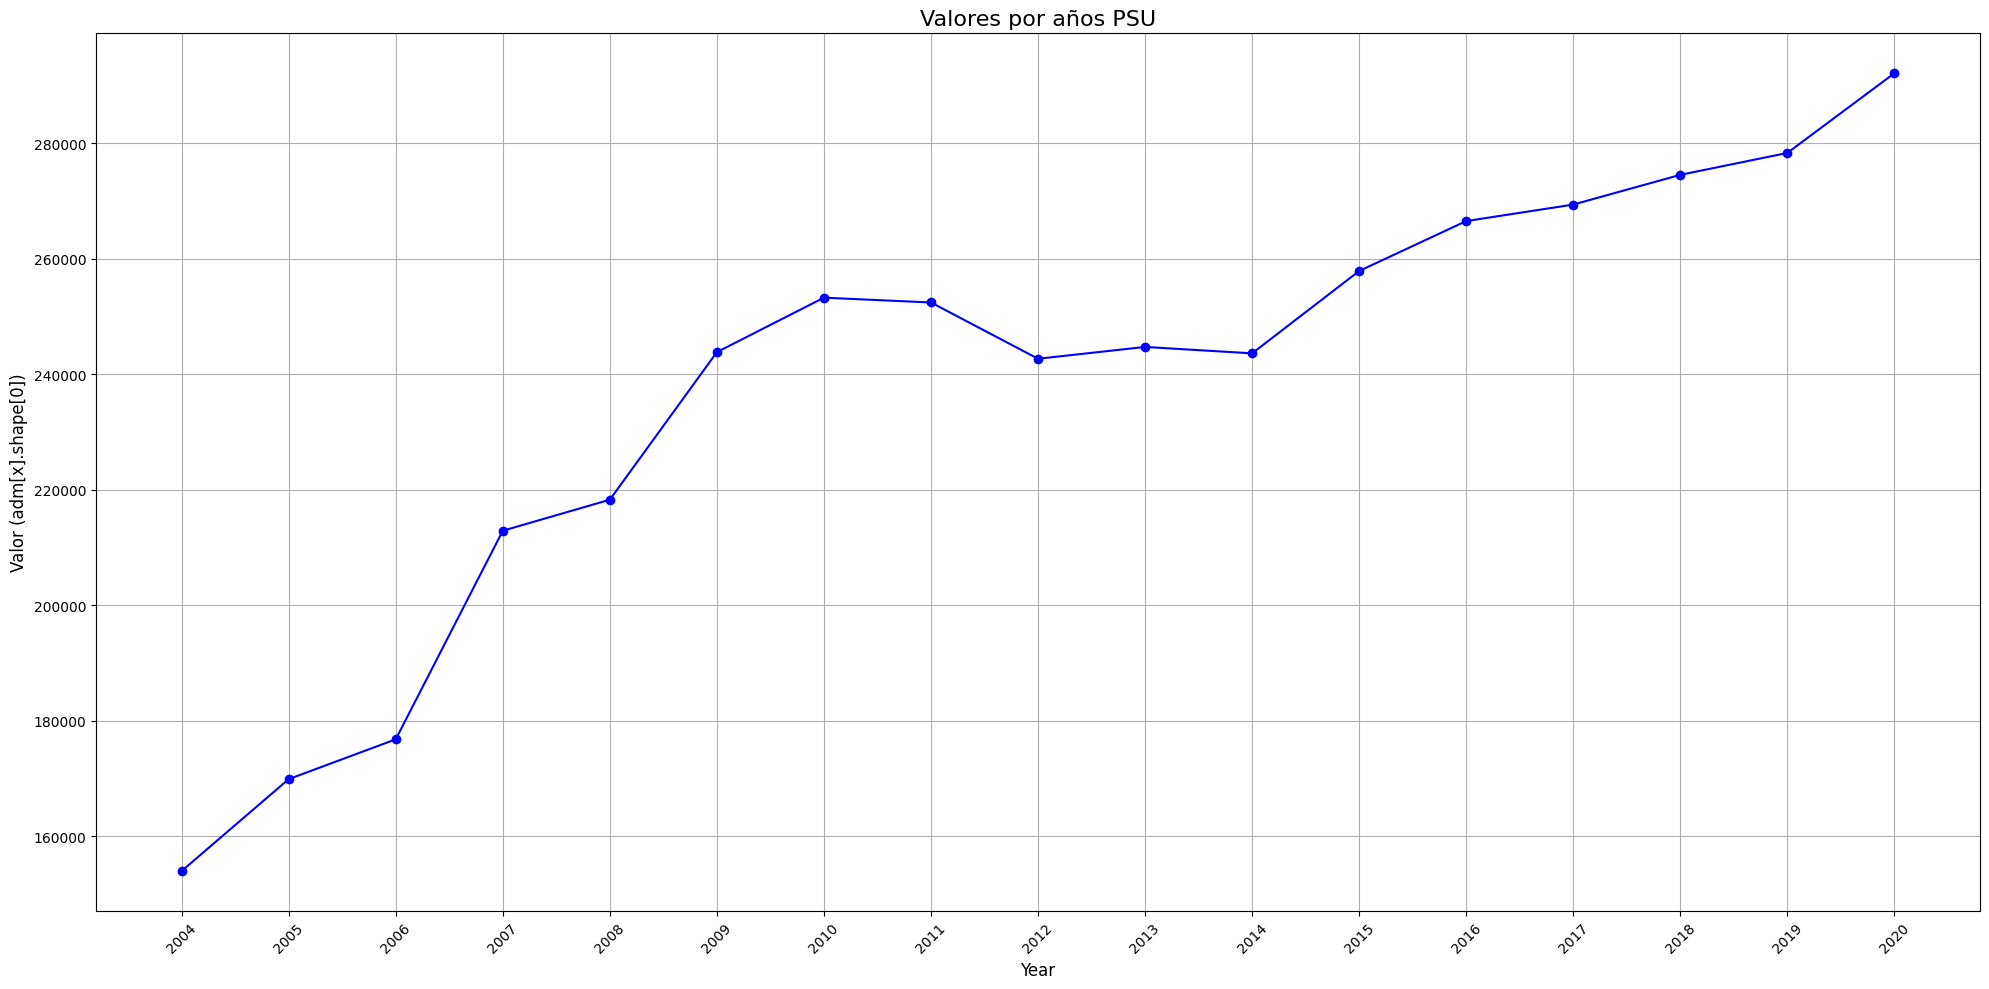

In [98]:
# PSU del 2004 al 2020 como ultimo año
tmp = [153982, 169888, 176778, 212889, 218261,
       243809, 253236, 252402, 242661, 244707,
       243596, 257852,266494, 269351, 274498,
       278287, 292091]

years = list(range(2004, 2021))

plt.figure(figsize=(20, 10))
plt.plot(years, tmp, marker='o', linestyle='-', color='b')
plt.title('Valores por años PSU', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Valor (adm[x].shape[0])', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

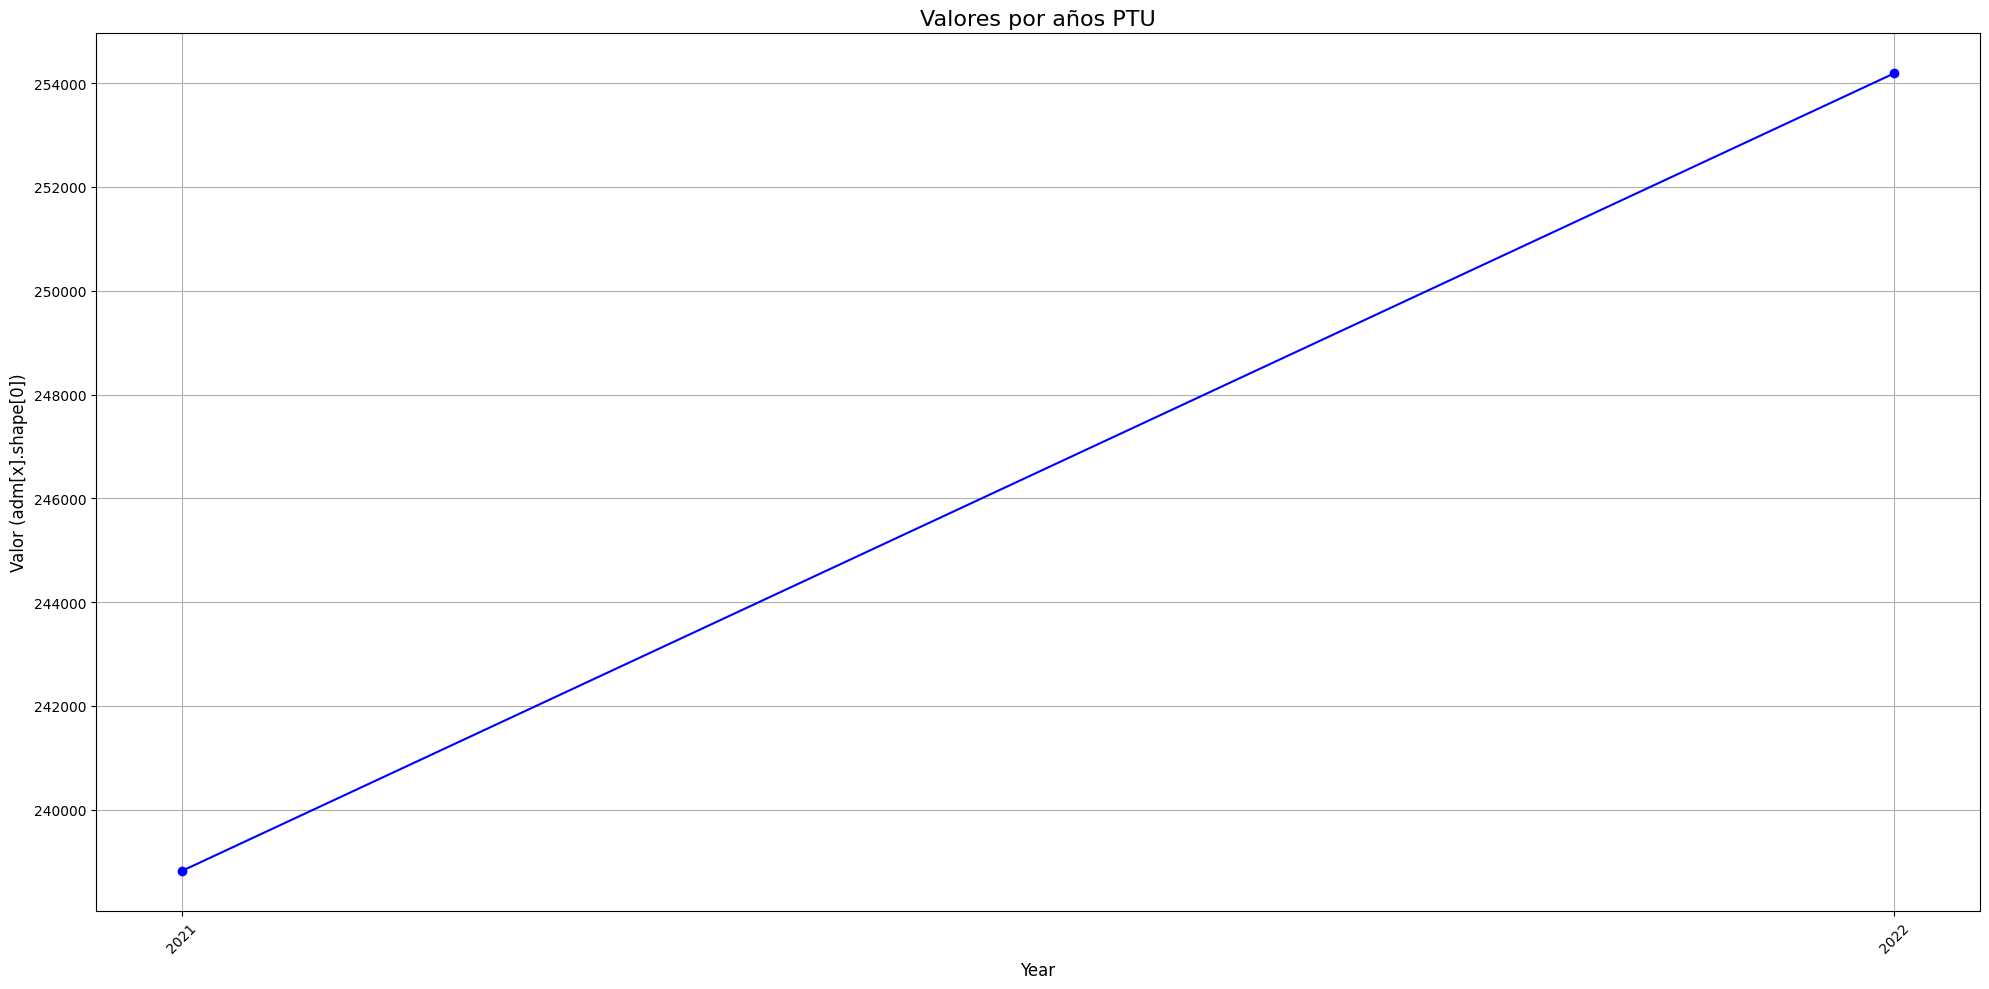

In [99]:
#PTU se hizo en el año 2021 y 2022
tmp =[238818, 254191]
years = [2021, 2022]

plt.figure(figsize=(20, 10))
plt.plot(years, tmp, marker='o', linestyle='-', color='b')
plt.title('Valores por años PTU', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Valor (adm[x].shape[0])', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

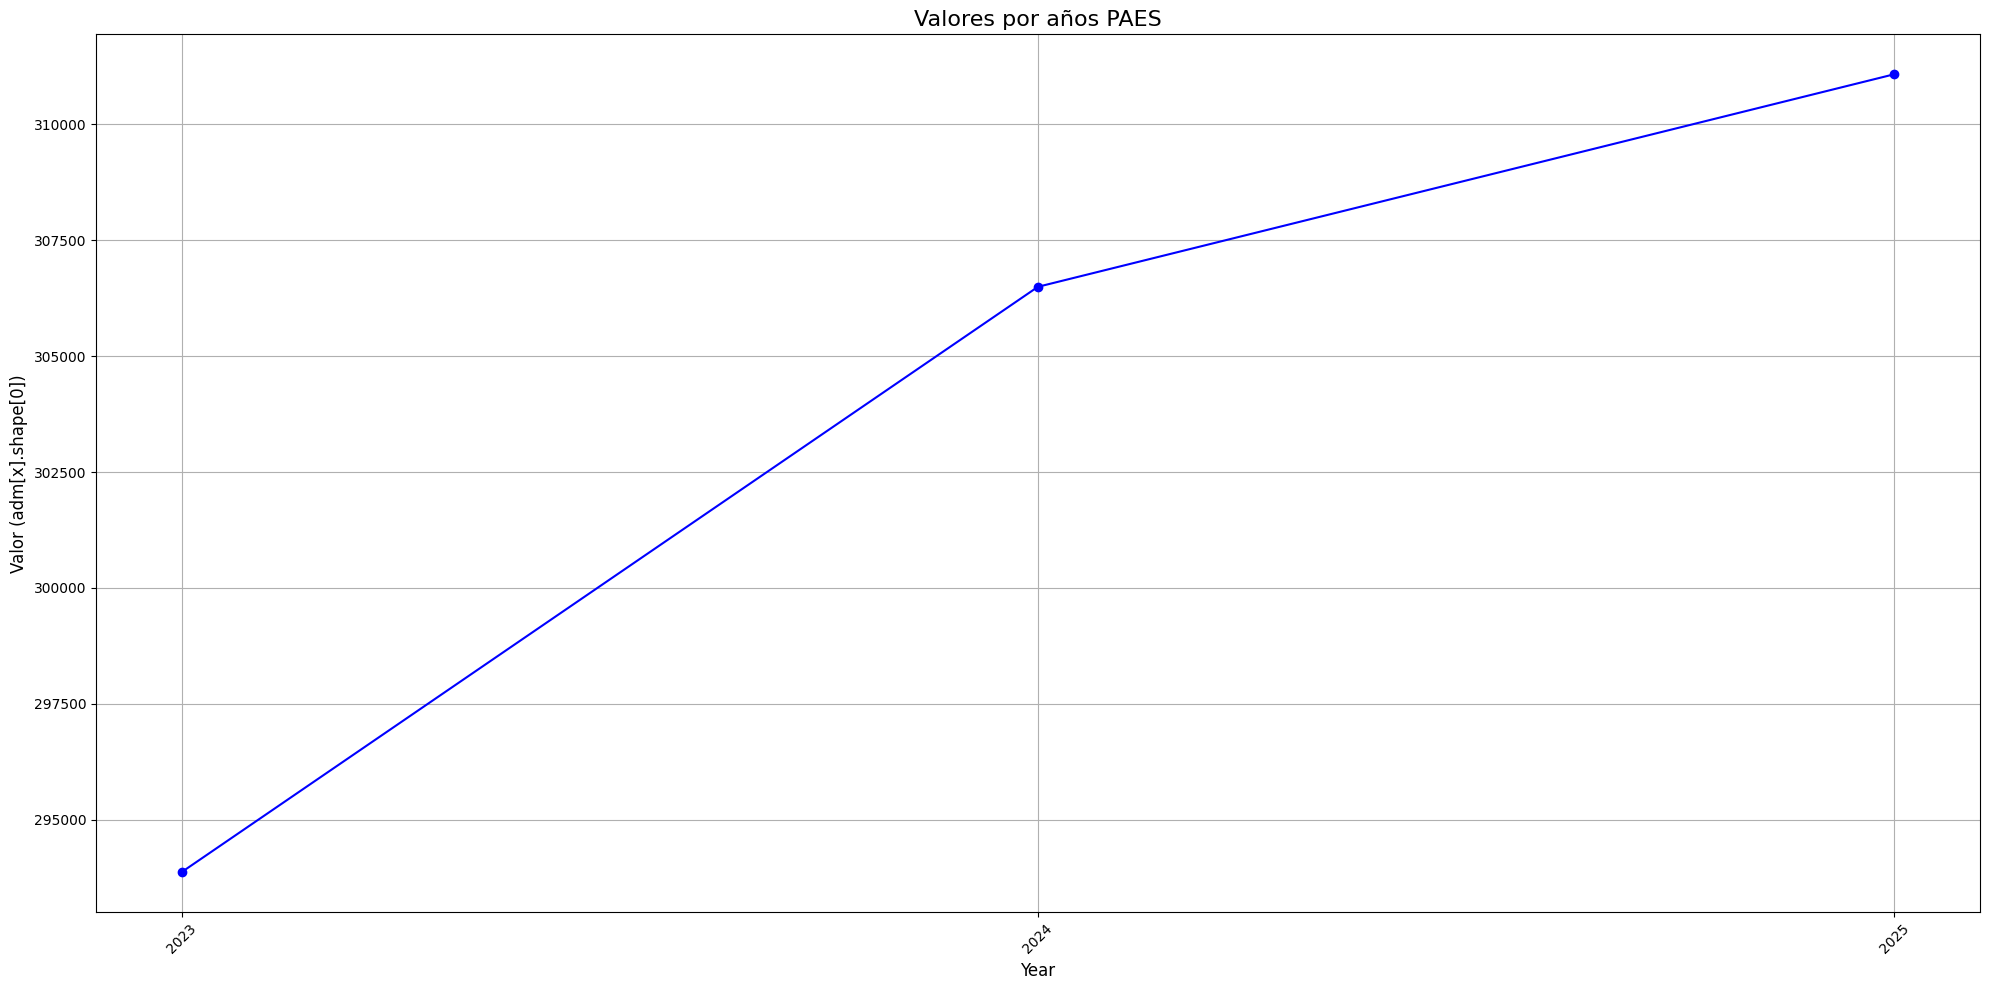

In [100]:
#PAES 2023 y 2025
tmp= [293865,306497, 311084]
years = [2023, 2024, 2025]

plt.figure(figsize=(20,10))
plt.plot(years, tmp, marker='o', linestyle='-', color='b')
plt.title('Valores por años PAES', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Valor (adm[x].shape[0])', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

#####  En los graficos anterior, podemos ver una tendencia alcista con el tiempo. Cada año hay mas inscritos. Esto lo podemos ver como que mas gente ha tenido acceso a la educacion superior. 


##### Viendo la grafica de la PSU, hay algo super notrio y fuera de lugar, que en el 2010 hubo una baja de inscripciones a la educacion superior. Esto esto lo podemos relacion con el terremoto del 2010, ademas justo luego de el hubo un descenso en las inscripciones, algo no visto a lo largo de los años. 
##### Segun fuentes: https://es.wikipedia.org/wiki/Terremoto_de_Chile_de_2010 
##### dejo a mas de 250.000 viviendas afectadas, lo cual logicamente afecto a todos los futuros estudiantes y su admision. Lo analizaremos mas a detalle.

##### en la PTU sigue en tendencia alsista, algo de esperarse.

##### en la PAES sigue patrones normales al alza.

### Pregunta 3.
###### Según el grupo socioeconómico, ¿cuál fue el porcentaje de ingresos en las distintas universidades?


In [28]:
import pandas as pd
from pathlib import Path

PATH = Path('raw_data')
YEARS = range(2004, 2026)


def cargar_matriculas():
    registros = []
    for anio in YEARS:
        candidatos = list((PATH / str(anio)).glob('**/ArchivoMat_Adm*.csv'))
        if not candidatos:
            continue
        for archivo in candidatos:
            try:
                df = pd.read_csv(
                    archivo, sep=';', dtype={'ID_aux': 'string'},
                    usecols=lambda c: c in {'ID_aux', 'CODIGO_UNIV', 'PTJE_POND'},
                    low_memory=False,
                )
            except (TypeError, ValueError):
                df = pd.read_csv(archivo, sep=';', dtype={'ID_aux': 'string'}, low_memory=False)
                columnas = [c for c in ['ID_aux', 'CODIGO_UNIV', 'PTJE_POND'] if c in df.columns]
                df = df[columnas]
            if df.empty or 'ID_aux' not in df.columns:
                continue
            df['ID'] = df['ID_aux'].astype('string').str.strip().str.lower()
            df['ANIO'] = anio
            if 'PTJE_POND' in df.columns:
                df['PTJE_POND'] = (
                    df['PTJE_POND'].astype('string')
                    .str.replace('.', '', regex=False)
                    .str.replace(',', '.', regex=False)
                )
                df['PTJE_POND'] = pd.to_numeric(df['PTJE_POND'], errors='coerce')
            registros.append(df[['ID', 'ANIO', 'CODIGO_UNIV', 'PTJE_POND']])
    if registros:
        mat = pd.concat(registros, ignore_index=True).dropna(subset=['ID'])
        mat['ANIO'] = mat['ANIO'].astype(int)
        return mat.drop_duplicates(subset=['ID', 'ANIO'], keep='last')
    return pd.DataFrame(columns=['ID', 'ANIO', 'CODIGO_UNIV', 'PTJE_POND'])


mat_all = cargar_matriculas()
if mat_all.empty:
    raise ValueError('No se encontraron archivos de matrícula en las carpetas especificadas.')

mat_lookup = mat_all.set_index(['ID', 'ANIO'])
mat_keys = set(mat_lookup.index)
pond_lookup = mat_lookup['PTJE_POND'].to_dict()
univ_lookup = mat_lookup['CODIGO_UNIV'].to_dict()

total_por_egr_list = []
mat_por_egr_list = []
matriculados_chunks = []

for anio in YEARS:
    archivos = list((PATH / str(anio)).glob('**/ArchivoC_Adm*.csv'))
    if not archivos:
        continue
    print(f'Procesando admisión {anio} ({len(archivos)} archivos)...')
    for archivo in archivos:
        df = pd.read_csv(archivo, sep=';', dtype={'ID_aux': 'string'}, low_memory=False)
        columnas = [c for c in ['ID_aux', 'SITUACION_EGRESO', 'CODIGO_COMUNA', 'GRUPO_DEPENDENCIA'] if c in df.columns]
        if 'ID_aux' not in columnas:
            continue
        df = df[columnas].copy()
        df['ID'] = df['ID_aux'].astype('string').str.strip().str.lower()
        df['ANIO'] = anio
        sit_numeric = pd.to_numeric(df.get('SITUACION_EGRESO'), errors='coerce')
        df['SIT_EGRESO_STR'] = sit_numeric.fillna(-1).astype(int).astype(str)
        df.loc[sit_numeric.isna(), 'SIT_EGRESO_STR'] = 'Desconocido'
        df['CODIGO_COMUNA'] = pd.to_numeric(df.get('CODIGO_COMUNA'), errors='coerce')
        df['GRUPO_DEPENDENCIA'] = pd.to_numeric(df.get('GRUPO_DEPENDENCIA'), errors='coerce')
        df['key'] = list(zip(df['ID'], df['ANIO']))
        df['MATRICULADO'] = df['key'].isin(mat_keys)

        total_por_egr_list.append(
            df['SIT_EGRESO_STR'].value_counts(dropna=False).rename_axis('SIT_EGRESO_STR').reset_index(name='n_total')
        )

        matriculados_df = df[df['MATRICULADO']].copy()
        if matriculados_df.empty:
            continue

        mat_por_egr_list.append(
            matriculados_df['SIT_EGRESO_STR'].value_counts(dropna=False).rename_axis('SIT_EGRESO_STR').reset_index(name='n_matriculados')
        )

        matriculados_df['PTJE_POND'] = matriculados_df['key'].map(pond_lookup)
        matriculados_df['CODIGO_UNIV'] = matriculados_df['key'].map(univ_lookup)
        matriculados_chunks.append(
            matriculados_df[['CODIGO_COMUNA', 'GRUPO_DEPENDENCIA', 'SIT_EGRESO_STR', 'PTJE_POND', 'CODIGO_UNIV']].copy()
        )

if not total_por_egr_list:
    raise ValueError('No se encontraron archivos de admisión para procesar.')

total_por_egr = (
    pd.concat(total_por_egr_list, ignore_index=True)
    .groupby('SIT_EGRESO_STR', as_index=False)['n_total']
    .sum()
)

if mat_por_egr_list:
    mat_por_egr = (
        pd.concat(mat_por_egr_list, ignore_index=True)
        .groupby('SIT_EGRESO_STR', as_index=False)['n_matriculados']
        .sum()
    )
else:
    mat_por_egr = pd.DataFrame(columns=['SIT_EGRESO_STR', 'n_matriculados'])

if matriculados_chunks:
    matriculados_all = pd.concat(matriculados_chunks, ignore_index=True)
else:
    matriculados_all = pd.DataFrame(columns=['CODIGO_COMUNA', 'GRUPO_DEPENDENCIA', 'SIT_EGRESO_STR', 'PTJE_POND', 'CODIGO_UNIV'])

matriculados_totales = len(matriculados_all)
print(f"\nTotal de matriculados encontrados en todas las fuentes: {matriculados_totales:,}")

if matriculados_totales:
    df_comuna = (
        matriculados_all.dropna(subset=['CODIGO_COMUNA'])
        .assign(CODIGO_COMUNA=lambda d: d['CODIGO_COMUNA'].astype(int))
        .value_counts('CODIGO_COMUNA')
        .rename('matriculados')
        .reset_index()
        .assign(porcentaje=lambda d: 100 * d['matriculados'] / matriculados_totales)
        .sort_values('porcentaje', ascending=False)
    )

    df_dep = (
        matriculados_all.dropna(subset=['GRUPO_DEPENDENCIA'])
        .assign(GRUPO_DEPENDENCIA=lambda d: d['GRUPO_DEPENDENCIA'].astype(int))
        .value_counts('GRUPO_DEPENDENCIA')
        .rename('matriculados')
        .reset_index()
        .assign(porcentaje=lambda d: 100 * d['matriculados'] / matriculados_totales)
        .sort_values('GRUPO_DEPENDENCIA')
    )

    df_univ_dep = (
        matriculados_all.dropna(subset=['CODIGO_UNIV', 'GRUPO_DEPENDENCIA'])
        .assign(CODIGO_UNIV=lambda d: d['CODIGO_UNIV'].astype(int),
                GRUPO_DEPENDENCIA=lambda d: d['GRUPO_DEPENDENCIA'].astype(int))
        .value_counts(['CODIGO_UNIV', 'GRUPO_DEPENDENCIA'])
        .rename('matriculados')
        .reset_index()
    )
    if not df_univ_dep.empty:
        df_univ_dep['porcentaje_en_univ'] = (
            df_univ_dep['matriculados'] / df_univ_dep.groupby('CODIGO_UNIV')['matriculados'].transform('sum') * 100
        )
        df_univ_dep = df_univ_dep.sort_values('porcentaje_en_univ', ascending=False).reset_index(drop=True)
        df_univ_dep['RANGO_TOP'] = df_univ_dep.index + 1
else:
    df_comuna = pd.DataFrame(columns=['CODIGO_COMUNA', 'matriculados', 'porcentaje'])
    df_dep = pd.DataFrame(columns=['GRUPO_DEPENDENCIA', 'matriculados', 'porcentaje'])
    df_univ_dep = pd.DataFrame(columns=['CODIGO_UNIV', 'GRUPO_DEPENDENCIA', 'matriculados', 'porcentaje_en_univ', 'RANGO_TOP'])

print('\n--- PREGUNTA 3: % de ingresos por comuna (top 20) ---')
display(df_comuna.head(20))
print('\n--- PREGUNTA 3: distribución por grupo de dependencia ---')
display(df_dep)
if not df_univ_dep.empty:
    print('\n--- PREGUNTA 3: participación por grupo de dependencia dentro de cada universidad (top 30) ---')
    display(df_univ_dep.head(30))

if not matriculados_all.empty:
    pond_prom = (
        matriculados_all.dropna(subset=['PTJE_POND'])
        .groupby('SIT_EGRESO_STR')['PTJE_POND']
        .mean()
        .reset_index(name='promedio_ptje_ponderado')
    )
else:
    pond_prom = pd.DataFrame(columns=['SIT_EGRESO_STR', 'promedio_ptje_ponderado'])

total_por_egr = total_por_egr[total_por_egr['SIT_EGRESO_STR'] != "Desconocido"]
mat_por_egr = mat_por_egr[mat_por_egr['SIT_EGRESO_STR'] != "Desconocido"]


Procesando admisión 2004 (1 archivos)...
Procesando admisión 2005 (1 archivos)...
Procesando admisión 2006 (1 archivos)...
Procesando admisión 2007 (1 archivos)...
Procesando admisión 2008 (1 archivos)...
Procesando admisión 2009 (1 archivos)...
Procesando admisión 2010 (1 archivos)...
Procesando admisión 2011 (1 archivos)...
Procesando admisión 2012 (1 archivos)...
Procesando admisión 2013 (1 archivos)...
Procesando admisión 2014 (1 archivos)...
Procesando admisión 2015 (1 archivos)...
Procesando admisión 2016 (1 archivos)...
Procesando admisión 2017 (1 archivos)...
Procesando admisión 2018 (1 archivos)...
Procesando admisión 2019 (1 archivos)...
Procesando admisión 2020 (1 archivos)...
Procesando admisión 2021 (1 archivos)...
Procesando admisión 2022 (1 archivos)...
Procesando admisión 2023 (1 archivos)...
Procesando admisión 2024 (1 archivos)...
Procesando admisión 2025 (1 archivos)...

Total de matriculados encontrados en todas las fuentes: 856,751

--- PREGUNTA 3: % de ingresos po

,CODIGO_COMUNA,matriculados,porcentaje
0,13101,48599,5.672477
1,8101,33491,3.909070
2,13123,26457,3.088062
3,9101,25985,3.032970
4,13114,23219,2.710122
5,5109,22340,2.607525
6,2101,21632,2.524888
7,13119,19853,2.317243
8,13110,18963,2.213362
9,5101,18900,2.206009



--- PREGUNTA 3: distribución por grupo de dependencia ---


,GRUPO_DEPENDENCIA,matriculados,porcentaje
3,0,4139,0.483104
2,1,173304,20.228048
0,2,422980,49.370237
1,3,256328,29.918611



--- PREGUNTA 3: participación por grupo de dependencia dentro de cada universidad (top 30) ---


,CODIGO_UNIV,GRUPO_DEPENDENCIA,matriculados,porcentaje_en_univ,RANGO_TOP
0,456,3,34,100.000000,1
1,111,3,26,100.000000,2
2,43,1,7155,85.188713,3
3,42,1,8403,81.400756,4
4,48,2,49,77.777778,5
5,44,1,10339,68.370586,6
6,25,2,14714,67.006694,7
7,46,2,836,64.357198,8
8,12,1,36237,64.037676,9
9,23,2,7626,63.323092,10


## Pregunta 4.
#### ¿Qué comunas presentaron los mayores porcentajes de ingresos a la educación superior?


### Para responder a la pregunta veremos los datos y seleccionaremos las columnas utiles para responder la misma


In [29]:
datos_adm = adm[14:len(adm)]

columna = ['ID_aux', 'CODIGO_REGION', 'CODIGO_COMUNA']
for df in range(len(datos_adm)):
    datos_adm[df] = datos_adm[df][columna]
    
datos_adm[1].head()



,ID_aux,CODIGO_REGION,CODIGO_COMUNA
0,id_0000900070019,14.0,14101.0
1,id_0000900270084,15.0,15101.0
2,id_0000900370016,5.0,5502.0
3,id_0000900370067,5.0,5502.0
4,id_0000900370092,5.0,5502.0


#### Ahora uniremos los datos para poder poseer todos los datos en un unico dataframe, ordenados en base al id

In [30]:
datos_final = []
for i in range((len(datos_adm))):
    datos_final.append(pd.merge(datos_adm[i] , datos_egresado[i], on = 'ID_aux', how='inner'))

datos_final[1].head() 

,ID_aux,CODIGO_REGION,CODIGO_COMUNA,CODIGO_UNIV,CODIGO,VIA,PREFERENCIA,PTJE_POND,POND_ANYO_ACAD,TIPO_MATRICULA
0,id_0000900370016,5.0,5502.0,26,26010,1,1,"588,55",1,1
1,id_0000900470020,13.0,13104.0,38,38292,1,1,"586,5",1,1
2,id_0000900970026,11.0,11101.0,48,48005,1,1,"638,3",1,1
3,id_0001900370153,7.0,7405.0,35,35001,1,1,"583,35",1,1
4,id_0001900470113,13.0,13301.0,53,53306,1,1,"438,4",2,1


#### Ahora haremos una breve limpieza de datos eliminando columnas y calculando el porcentaje

In [31]:
cantidad_comuna = []
for i in datos_final:
    cantidad_datos = len(i)
    i["CODIGO_COMUNA"] = i["CODIGO_COMUNA"].astype(int)
    seriee = i["CODIGO_COMUNA"].value_counts().head(10)
    dff = seriee.reset_index()
    dff.columns = ['CODIGO_COMUNA', 'Cantidad']
    dff["Porcentaje"] = round((dff["Cantidad"] / cantidad_datos) * 100 , 3)
    cantidad_comuna.append((dff))
cantidad_comuna[0].head(10) 

,CODIGO_COMUNA,Cantidad,Porcentaje
0,13101,5509,5.441
1,13119,3178,3.139
2,9101,3163,3.124
3,13114,2862,2.827
4,8101,2861,2.826
5,13201,2774,2.740
6,13123,2771,2.737
7,13110,2480,2.450
8,2101,2270,2.242
9,5109,2257,2.229



#### Se modifica el codigo comuna para tambien mostrar el nombre de la comuna, de forma que se pueda leer que comuna es



In [32]:

comuna_c = dcopy(comuna)
comuna_c = comuna_c[14:len(comuna)]
renombre_comuna = dcopy(cantidad_comuna)
lista_final = []

df_10 = renombre_comuna[0]
df_look = comuna_c[0]
df_look = df_look[["COM", "COM_NOMBRE"]]
df_look.columns = ["CODIGO_COMUNA" , "NOMBRE_COMUNA" ]
df = pd.merge(df_10 , df_look , on= "CODIGO_COMUNA" , how="left" )
lista_final.append(df[["CODIGO_COMUNA" , "NOMBRE_COMUNA" , "Cantidad" , "Porcentaje"]])





for i in range(len(comuna_c) - 2):
    df_10 = renombre_comuna[i + 1]
    df_look = comuna_c[i + 1]
    df_look = df_look[["COD.COMUNA", "COM NOMBRE"]]
    df_look.columns = ["CODIGO_COMUNA" , "NOMBRE_COMUNA" , ]
    
    df = pd.merge(df_10 , df_look , on= "CODIGO_COMUNA" , how="left" )
    lista_final.append(df[["CODIGO_COMUNA" , "NOMBRE_COMUNA" , "Cantidad" , "Porcentaje" ]])
    
lista_final[1].head()

,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,5282,5.090
1,13119,MAIPU,3364,3.242
2,9101,TEMUCO,3218,3.101
3,13114,LAS CONDES,2835,2.732
4,13201,PUENTE ALTO,2783,2.682


#### de esta forma se responde a la pregunta ¿Qué comunas presentaron los mayores porcentajes de ingresos a la educación superior? a lo largo de los años 2018 a 2024

In [33]:
#en caso de desear ver el top 10 anual se cambia la variable datos_presentes
datos_presentes = 3
for i in range(len(lista_final)):
    print("Año :",2018 + i)
    display(lista_final[i].head(datos_presentes))

Año : 2018


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,5509,5.441
1,13119,MAIPU,3178,3.139
2,9101,TEMUCO,3163,3.124


Año : 2019


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,5282,5.090
1,13119,MAIPU,3364,3.242
2,9101,TEMUCO,3218,3.101


Año : 2020


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,4926,5.027
1,13119,MAIPU,3252,3.319
2,9101,TEMUCO,3165,3.230


Año : 2021


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,4452,4.824
1,9101,TEMUCO,2747,2.977
2,13119,MAIPU,2719,2.946


Año : 2022


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,4452,4.640
1,13119,MAIPU,3015,3.143
2,9101,TEMUCO,2777,2.895


Año : 2023


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,4799,4.312
1,13119,MAIPU,3426,3.078
2,13201,PUENTE ALTO,3392,3.048


Año : 2024


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,4814,4.067
1,13119,MAIPU,3646,3.080
2,13201,PUENTE ALTO,3479,2.939


## Pregunta 5.
#### ¿Qué relación existe entre la situación de egreso de los estudiantes y los resultados de admisión a la educación superior?


##### Relación egreso y resultados admisión

In [34]:
df_p5 = (
    total_por_egr.merge(mat_por_egr, on='SIT_EGRESO_STR', how='left').fillna({'n_matriculados': 0})
    .merge(pond_prom, on='SIT_EGRESO_STR', how='left')
    .assign(**{'tasa_matricula_%': lambda d: (d['n_matriculados'] / d['n_total']) * 100})
    .sort_values('tasa_matricula_%', ascending=False)
)

display(df_p5)

,SIT_EGRESO_STR,n_total,n_matriculados,promedio_ptje_ponderado,tasa_matricula_%
6,7,695,179,641.953073,25.755396
4,5,1659394,326029,603.219285,19.647474
2,3,459,83,666.982289,18.082789
0,1,3750497,526498,621.139060,14.038086
5,6,20153,1950,577.620415,9.675979
7,8,4577,411,610.987105,8.979681
1,2,17723,1562,578.841364,8.813406
3,4,1738,39,623.351282,2.243959


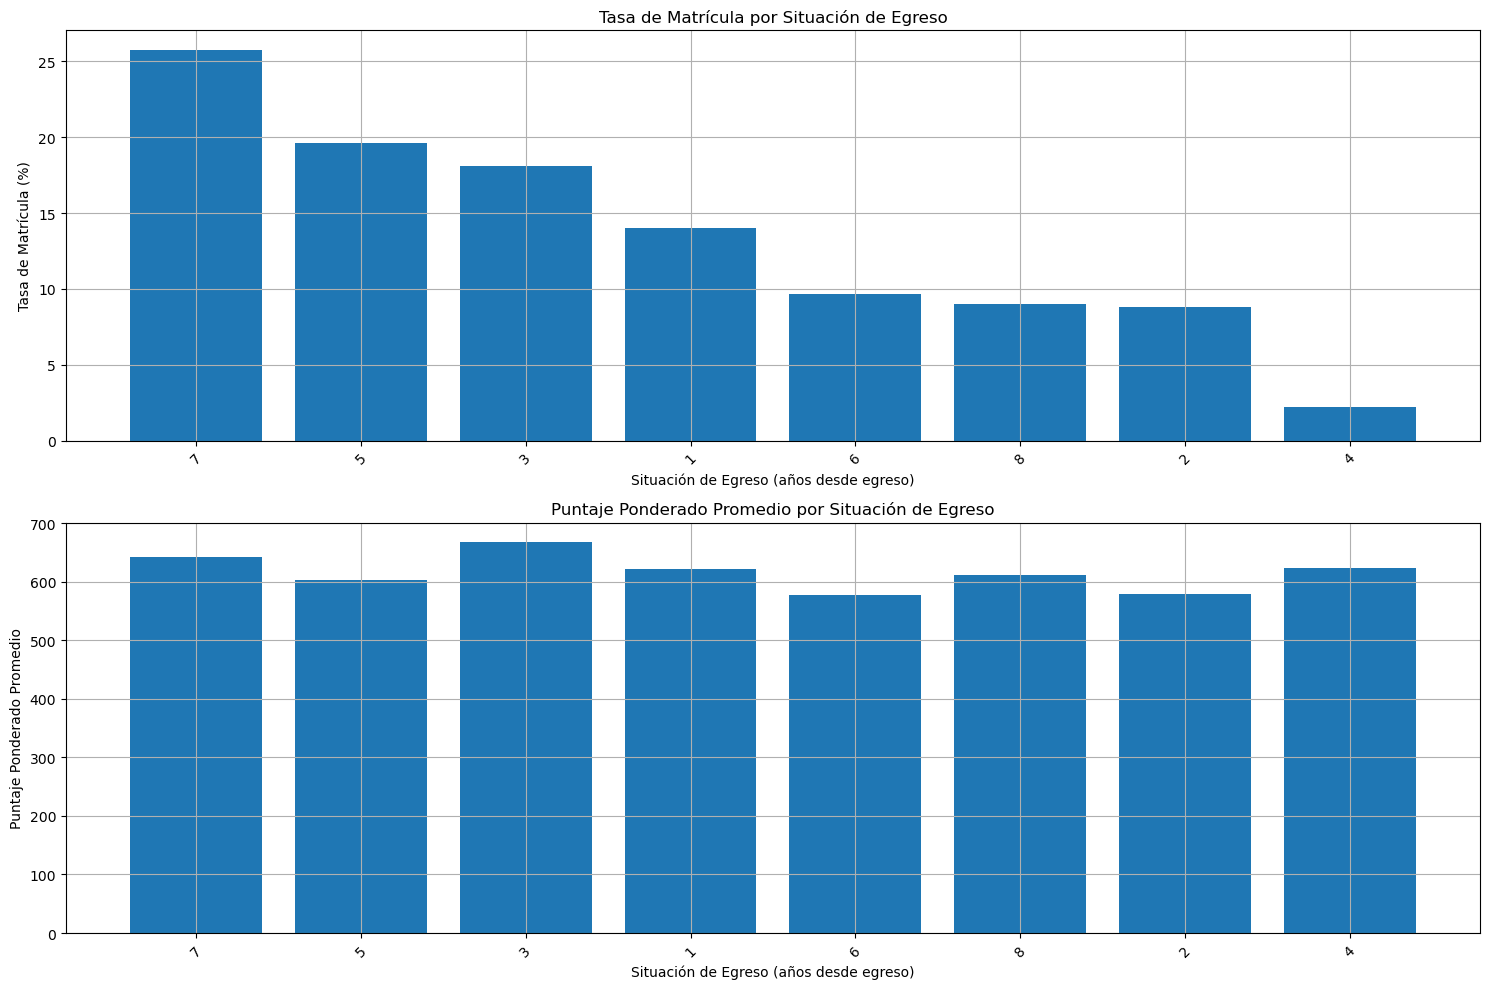

In [35]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.grid'] = True
plt.figure()

# Gráfico para tasa de matrícula por situación de egreso
plt.subplot(2, 1, 1)
plt.bar(df_p5['SIT_EGRESO_STR'], df_p5['tasa_matricula_%'])
plt.title('Tasa de Matrícula por Situación de Egreso')
plt.xlabel('Situación de Egreso (años desde egreso)')
plt.ylabel('Tasa de Matrícula (%)')
plt.xticks(rotation=45)

# Gráfico de puntajes promedio por situación de egreso
plt.subplot(2, 1, 2)
plt.bar(df_p5['SIT_EGRESO_STR'], df_p5['promedio_ptje_ponderado'])
plt.title('Puntaje Ponderado Promedio por Situación de Egreso')
plt.xlabel('Situación de Egreso (años desde egreso)')
plt.ylabel('Puntaje Ponderado Promedio')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### HALLAZGOS PRINCIPALES:
##### - Mayor tasa de matrícula: 25.8% (Situación: 7)
##### - Menor tasa de matrícula: 2.2% (Situación: 4)
##### - Puntaje promedio más alto: 667.0 (Situación: 3)

#### CORRELACIONES:
##### - Correlación años desde egreso vs tasa de matrícula: 0.161
##### - Correlación años desde egreso vs puntaje promedio: -0.042

##### CONCLUSIÓN:
##### La relación entre situación de egreso y resultados de admisión muestra que los recién egresados (0 años) tienen mejores resultados tanto en tasas de matrícula como en puntajes, a su vez existe una tendencia descendente en ambos indicadores a medida que aumentan los años desde el egreso. La brecha más significativa se observa entre recién egresados y quienes llevan más tiempo fuera del sistema escolar, los datos sugieren que el tiempo transcurrido desde el egreso tiene un impacto negativo en las oportunidades de acceso a la educación superior

### Nuevas pregunta surgida en el proceso EDA:
######  ¿Realmente vale la pena volver a rendirla?"**

##### ¿Se notan cambios importantes, ya sea mejoras o bajas en los puntajes, durante el período 2020–2021 debido a la pandemia y la implementación de la PTU?

A que grupo_soc, le afecto mas el terremoto del 2010

¿Brecha de puntajes y tasas de matrícula por dependencia (municipal, subvencionado, particular) a lo largo del tiempo? Idea: medias/medianas, diferencias absolutas y relativas, tendencia temporal